<a href="https://colab.research.google.com/github/Barcklan/Barcklan-InforADD/blob/main/MLM2S4_Actividad_Clase_4_Claudio_D%C3%ADaz_Vargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de Algoritmo y Notación Big O**
##**Análisis de Algoritmos**: Búsqueda Lineal vs Binaria##
###Módulo 2 - Clase N° 4###
###Claudio Andrés Díaz Vargas###

#**1.- Implementación de Funciones de Búsqueda:**

A continuación, se implementa las Funciones de Búsqueda: Lineal y Binaria.

*   **Búsqueda Lineal**: Realiza una búsqueda lineal en la lista. Retorna el índice si encuentra el objetivo, o -1 si no lo encuentra. Su complejidad temporal es O(n).

*   **Búsqueda Binaria**: Realiza una búsqueda binaria en una lista ordenada. Retorna el índice si encuentra el objetivo, o -1 si no lo encuentra. su complejidad temporal es O(log n).



In [1]:
import timeit
import matplotlib.pyplot as plt

# -----------------------------
# 1. Implementación de Funciones de Búsqueda
# -----------------------------

def busqueda_lineal(lista, objetivo):
    """
    Realiza una búsqueda lineal en la lista.
    Retorna el índice si encuentra el objetivo, o -1 si no lo encuentra.
    Complejidad temporal: O(n)
    """
    for i in range(len(lista)):
        if lista[i] == objetivo:
            return i
    return -1

def busqueda_binaria(lista, objetivo):
    """
    Realiza una búsqueda binaria en una lista ordenada.
    Retorna el índice si encuentra el objetivo, o -1 si no lo encuentra.
    Complejidad temporal: O(log n)
    """
    izquierda = 0
    derecha = len(lista) - 1

    while izquierda <= derecha:
        medio = (izquierda + derecha) // 2
        if lista[medio] == objetivo:
            return medio
        elif lista[medio] < objetivo:
            izquierda = medio + 1
        else:
            derecha = medio - 1
    return -1


#**2.- Generación de Datos:**

Crearemos tres listas de diferentes tamaños (10^4, 10^5 y 10^6 de elementos) de números de enteros ordenado.

In [2]:
# -----------------------------------------
# 2. Generación de datos
# -----------------------------------------

tamaños = [10**4, 10**5, 10**6]
listas = [list(range(t)) for t in tamaños]

# Generar objetivos para cada tipo de caso
objetivos = {
    "mejor":   [lista[0] for lista in listas],                # Primer elemento
    "medio":   [lista[len(lista)//2] for lista in listas],    # Elemento del medio
    "peor":    [lista[-1] for lista in listas]                # Último elemento
}


#**3.- Medición de tiempo para los Casos: Mejor; Medio; y Peor**

En este paso realizamos la medición (en tiempo) del rendimiento para cada caso, tanto para la búsqueda lineal como en la búsqueda binaria e imprimiremos sus resultados.

In [3]:
# -----------------------------------------
# 3. Medición de tiempo para todos los casos
# -----------------------------------------

resultados = {
    "lineal": {"mejor": [], "medio": [], "peor": []},
    "binaria": {"mejor": [], "medio": [], "peor": []}
}

print(f"{'Caso':>6} | {'Tamaño':>10} | {'Lineal (s)':>12} | {'Binaria (s)':>12}")
print("-" * 50)

for caso in ["mejor", "medio", "peor"]:
    for i in range(len(tamaños)):
        lista = listas[i]
        objetivo = objetivos[caso][i]

        # Medir tiempos
        t_lineal = timeit.timeit(lambda: busqueda_lineal(lista, objetivo), number=1)
        t_binaria = timeit.timeit(lambda: busqueda_binaria(lista, objetivo), number=1)

        # Guardar resultados
        resultados["lineal"][caso].append(t_lineal)
        resultados["binaria"][caso].append(t_binaria)

        # Imprimir resultados
        print(f"{caso:>6} | {tamaños[i]:>10,} | {t_lineal:>12.6f} | {t_binaria:>12.6f}")



  Caso |     Tamaño |   Lineal (s) |  Binaria (s)
--------------------------------------------------
 mejor |     10,000 |     0.000002 |     0.000005
 mejor |    100,000 |     0.000002 |     0.000007
 mejor |  1,000,000 |     0.000002 |     0.000006
 medio |     10,000 |     0.000097 |     0.000005
 medio |    100,000 |     0.001022 |     0.000008
 medio |  1,000,000 |     0.011143 |     0.000012
  peor |     10,000 |     0.000364 |     0.000007
  peor |    100,000 |     0.002630 |     0.000006
  peor |  1,000,000 |     0.019929 |     0.000006


La búsqueda binaria es mucho más eficiente que la lineal para listas grandes y ordenadas. La diferencia de rendimiento se vuelve notable en los casos medio y peor a favor de la búsqueda binaria.

#**4.- Gráfica comparativa**
A continuación, presentamos gráficamente la comparación entre las búsquedas para cada caso (Mejor, Medio y Peor):

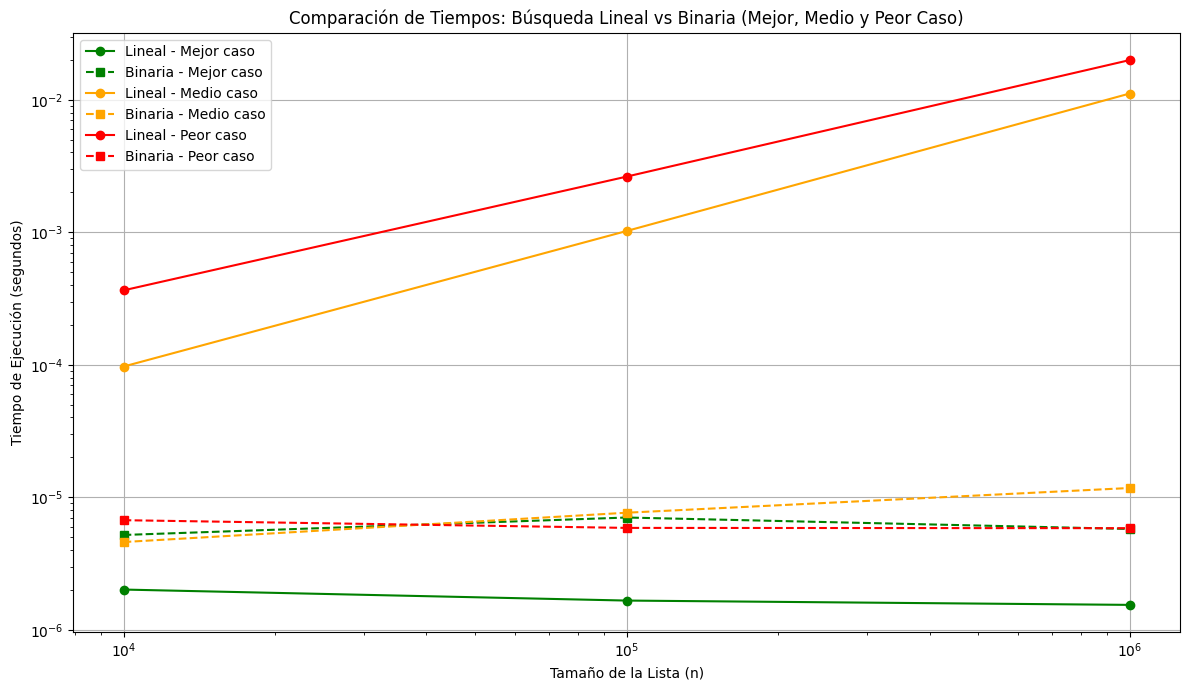

In [4]:
# -----------------------------------------
# 4. Gráfica comparativa
# -----------------------------------------

plt.figure(figsize=(12, 7))

# Colores para cada caso
colores = {
    "mejor": "green",
    "medio": "orange",
    "peor": "red"
}

# Graficar cada caso para ambos algoritmos
for caso in ["mejor", "medio", "peor"]:
    plt.plot(tamaños, resultados["lineal"][caso], marker='o',
             linestyle='-', color=colores[caso],
             label=f'Lineal - {caso.title()} caso')

    plt.plot(tamaños, resultados["binaria"][caso], marker='s',
             linestyle='--', color=colores[caso],
             label=f'Binaria - {caso.title()} caso')

# Configuración de la gráfica
plt.title("Comparación de Tiempos: Búsqueda Lineal vs Binaria (Mejor, Medio y Peor Caso)")
plt.xlabel("Tamaño de la Lista (n)")
plt.ylabel("Tiempo de Ejecución (segundos)")
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("comparacion_todos_los_casos.png")
plt.show()

La gráfica comparativa muestra el tiempo de ejecución de ambos algoritmos en tres escenarios: mejor caso, caso medio y peor caso, para listas de diferentes tamaños (10⁴, 10⁵, 10⁶).

- **Búsqueda Lineal:**
En el mejor caso, encuentra el objetivo inmediatamente. El tiempo es constante y bajo.

En el caso medio, el tiempo es intermedio, ya que en promedio revisa la mitad de la lista.

En el peor caso, revisa toda la lista, y el tiempo crece proporcionalmente al tamaño. Se visualiza como una pendiente pronunciada en la gráfica.

- **Búsqueda Binaria:**
En los tres casos (mejor, medio y peor), el tiempo de ejecución es bajo y casi constante.

Esto refleja su comportamiento O(log n), donde incluso para listas grandes, el número de comparaciones necesarias es pequeño.

**Conclusión visual:** La búsqueda binaria es mucho más eficiente que la lineal para listas grandes ordenadas. La diferencia de rendimiento se vuelve notable a partir de los 10⁵ elementos y se acentúa en listas de 10⁶ o más.

#**5.- Conclusiones**
- La búsqueda binaria demuestra una gran eficiencia en cualquier caso siempre que la lista esté ordenada.
- La búsqueda lineal es fácil de implementar y útil en listas pequeñas o desordenadas, pero su rendimiento se degrada rápidamente con el tamaño.
- Las diferencias de rendimiento, mostradas en escalas logarítmicas, confirman las predicciones teóricas de la notación Big O.
